# Regularization : Ridge vs. Lasso 🥊🥊
Ridge and Lasso are two variations of the regularization technique. The difference comes from a slight change in the mathematical expression of the cost function used to train the model. In this exercise, these two regularization srtategies will be compared in order to analyze their respective influence on the model's coefficients. The effect of the regularization strength $\alpha$ will also be studied.

## Importing libraries and loading the dataset

1. Import the usual libraries. Don't forget to import scikit-learn's following model classes:
* LinearRegression
* Ridge
* Lasso

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio




2. Execute the following line of code to read the dataset directly from our S3

In [3]:
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+r%C3%A9gularis%C3%A9es/gene+data/data_lasso.csv",)

In [4]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
0,0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,12.408154
1,1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,13.414970
2,2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,13.566183
3,3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,12.943886
4,4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,91.307146


3. The two first columns are useless, find a way to get rid of them.

In [5]:
dataset = dataset.iloc[:,2:]
dataset.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,12.408154
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,13.414970
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,13.566183
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,12.943886
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,91.307146


## Exploration

4. Print some information about the dataset. Do you notice something unusual ?

Number of rows : 801
Number of columns : 20532

Basics statistics: 


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,target
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411,41.219409
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529,37.655049
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000,11.433002
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000,13.415959
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000,89.166837
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133,100.000000



Percentage of missing values: 


gene_0        0.0
gene_1        0.0
gene_2        0.0
gene_3        0.0
gene_4        0.0
             ... 
gene_20527    0.0
gene_20528    0.0
gene_20529    0.0
gene_20530    0.0
target        0.0
Length: 20532, dtype: float64

5. Make sure there are no missing values at all in the whole dataset

The following will be 'False' if there's no missing values in the dataset:  False


## Preparing the data for machine learning
6. Separate the target from the features

Separating labels from features...
...Done.

Y : 
0    12.408154
1    13.414970
2    13.566183
3    12.943886
4    91.307146
Name: target, dtype: float64

X :
   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
4  0.360982     0.0     0.0  ...    5.996032    

7. Make a train/test splitting

Dividing into train and test sets...
...Done.



### Preprocessing
8. What preprocessings are necessary here ? Apply them to the features

Performing preprocessings on train set...
      gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
364  0.00000  0.000000  2.275752  6.025051  10.181674     0.0  6.112777   
458  0.75745  1.915330  1.182565  6.282078   8.972058     0.0  5.440902   
76   0.00000  3.195537  2.275156  5.719778   9.145591     0.0  7.333683   
64   0.00000  2.949311  4.597877  7.095460   9.762425     0.0  6.493412   
638  0.00000  3.777693  3.417920  7.031164   9.960924     0.0  8.119844   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
364  0.565890     0.0     0.0  ...    5.402804    7.875964   10.120121   
458  0.000000     0.0     0.0  ...    7.455081    8.825525   10.021993   
76   1.192762     0.0     0.0  ...    6.534924    9.382676    9.893725   
64   0.000000     0.0     0.0  ...    6.066335    9.048356   10.287493   
638  0.605020     0.0     0.0  ...    6.012622    9.200089   10.349337   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_2052

## Ridge
Let's focus on Ridge regularization. We'll train 3 Ridge regressors with different values of the strength $\alpha$, and analyze the performances as well as the influence on the model's coefficients.

9. Declare an instance of the Ridge class with $\alpha = 1$. Save this instance for later analysis into an object called `ridge1`. Train the model and display its R2-score on train and test sets.

Ridge()
R2 score on training set :  0.9999999996538701
R2 score on test set :  0.9867318246730054


10. Declare an instance of the Ridge class with $\alpha = 1000000$. Save this instance for later analysis into an object called `ridge2`. Train the model and display its R2-score on train and test sets.

Ridge(alpha=1000000)
R2 score on training set :  0.6372217335752035
R2 score on test set :  0.6308098494269021


11. Declare an instance of the Ridge class with $\alpha=100000000$. Save this instance for later analysis into an object called `ridge3`
. Train the model and display its R2-score on train and test sets.

Ridge(alpha=100000000)
R2 score on training set :  0.015173529447411016
R2 score on test set :  0.0032484988744883037


12. How do the scores vary when alpha changes? Can you explain what's happening?

13. Extract the coefficients of each of the three Ridge models, and store them into a DataFrame

,Feature,Ridge1,Ridge2,Ridge3
0,gene_0,-0.018817,-0.001181,-0.000022
1,gene_1,-0.003487,-0.001862,-0.000018
2,gene_2,-0.011201,-0.003263,-0.000048
3,gene_3,-0.005925,-0.000533,-0.000004
4,gene_4,-0.005402,0.003480,0.000061


14. Plot the coefficients of the three models in the same figure. What do you notice?

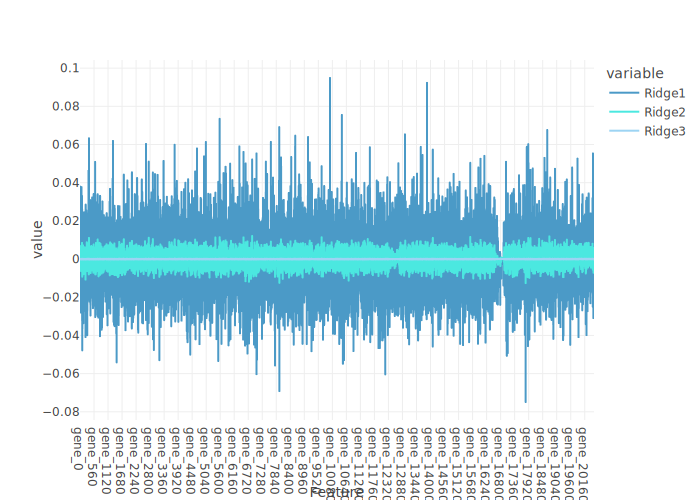

## Lasso
Let's make the same study with Lasso regularization.

15. Declare an instance of the Lasso class with $\alpha = 1$. Save this instance for later analysis into an object called `lasso1`. Train the model and display its R2-score on train and test sets.

Lasso(alpha=1)
R2 score on training set :  0.9867613949642098
R2 score on test set :  0.9850452712018385


16. Declare an instance of the Lasso class with $\alpha = 30$. Save this instance for later analysis into an object called `lasso2`. Train the model and display its R2-score on train and test sets.

Lasso(alpha=30)
R2 score on training set :  0.19531024198702607
R2 score on test set :  0.18407985096907375


17. Declare an instance of the Lasso class with $\alpha = 100$. Save this instance for later analysis into an object called `lasso3`. Train the model and display its R2-score on train and test sets.

Lasso(alpha=100)
R2 score on training set :  0.0
R2 score on test set :  -0.012180266796780526


18. Plot the coefficients of the three models in the same figure. What do you notice?

,Feature,Lasso1,Lasso2,Lasso3
0,gene_0,-0.0,-0.0,-0.0
1,gene_1,-0.0,-0.0,-0.0
2,gene_2,-0.0,-0.0,-0.0
3,gene_3,0.0,-0.0,-0.0
4,gene_4,0.0,0.0,0.0


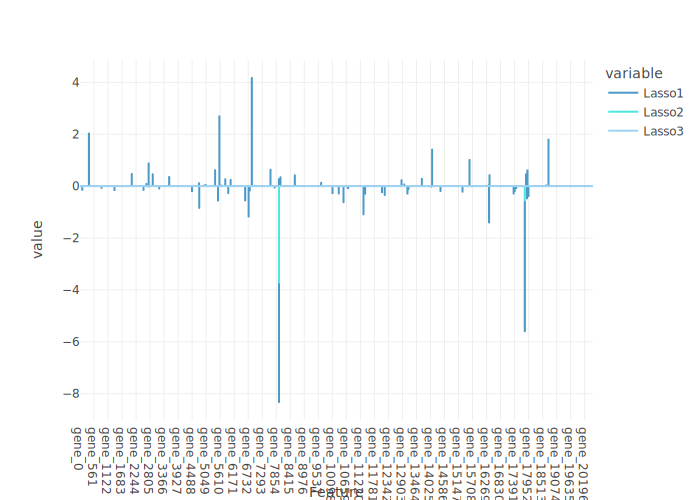

## Hyperparameter optimization
19. Use grid search to find the best value for $\alpha$, for Ridge and then for Lasso. You can test the following list of values:
* Ridge: $\alpha = $ [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
* Lasso: $\alpha = $ [1, 2, 3, 5, 10, 20, 30]

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9828796931032031


Grid search...
...Done.
Best hyperparameters :  {'alpha': 1}
Best R2 score :  0.97899787046442


### Comparing models
20. Display the scores on train set and test set for the best Ridge and for the best Lasso model.

RIDGE / R2 score on training set :  0.9999999999999654
RIDGE / R2 score on test set :  0.9867323625624244

LASSO / R2 score on training set :  0.9867613949642098
LASSO / R2 score on test set :  0.9850452712018385


21. Plot the coefficients of the best Ridge and best Lasso models in the same figure. If you had to deploy a model in production, which one would you choose and why?

,Feature,Best_Ridge,Best_Lasso
0,gene_0,-0.018820,-0.0
1,gene_1,-0.003489,-0.0
2,gene_2,-0.011201,-0.0
3,gene_3,-0.005926,0.0
4,gene_4,-0.005403,0.0


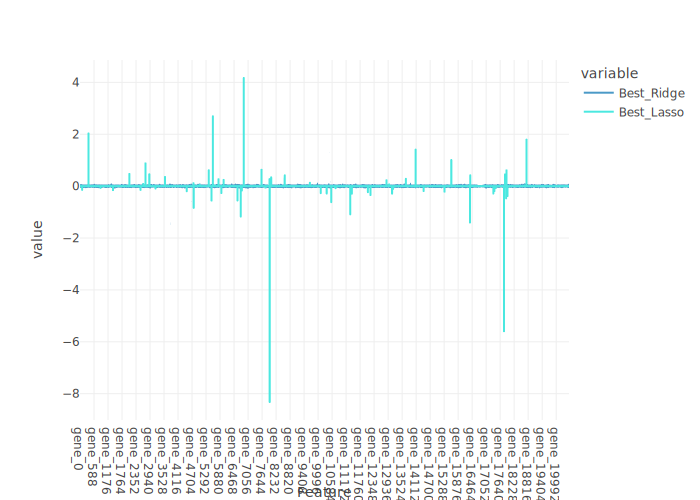

## Using Lasso as an automated feature selection method
Let's focus on the best Lasso model. Only a few features have non-zero coefficients, which means that we could train a model by including only these features, and still get the same performances.

22. Extract the names of the features that have non-zero coefficients in Lasso.

['gene_91',
 'gene_357',
 'gene_864',
 'gene_1384',
 'gene_1825',
 'gene_2073',
 'gene_2542',
 'gene_2655',
 'gene_2745',
 'gene_2747',
 'gene_2910',
 'gene_3170',
 'gene_3569',
 'gene_4481',
 'gene_4762',
 'gene_4773',
 'gene_4956',
 'gene_5027',
 'gene_5407',
 'gene_5523',
 'gene_5578',
 'gene_5663',
 'gene_5815',
 'gene_5934',
 'gene_6030',
 'gene_6611',
 'gene_6748',
 'gene_6795',
 'gene_6876',
 'gene_6976',
 'gene_7623',
 'gene_7790',
 'gene_7958',
 'gene_7964',
 'gene_8027',
 'gene_8594',
 'gene_8598',
 'gene_9652',
 'gene_10106',
 'gene_10357',
 'gene_10548',
 'gene_10707',
 'gene_10731',
 'gene_11346',
 'gene_11351',
 'gene_11412',
 'gene_11494',
 'gene_12086',
 'gene_12194',
 'gene_12866',
 'gene_12978',
 'gene_13103',
 'gene_13147',
 'gene_13681',
 'gene_13928',
 'gene_14062',
 'gene_14092',
 'gene_14426',
 'gene_15306',
 'gene_15514',
 'gene_15589',
 'gene_15830',
 'gene_16352',
 'gene_16372',
 'gene_16385',
 'gene_17287',
 'gene_17354',
 'gene_17397',
 'gene_17457',
 'gene_

23. Filter the feature matrix X to keep only these features, make a new train/test splitting from this X matrix and do the preprocessing once again

,gene_91,gene_357,gene_864,gene_1384,gene_1825,gene_2073,gene_2542,gene_2655,gene_2745,gene_2747,...,gene_17354,gene_17397,gene_17457,gene_17801,gene_17847,gene_17892,gene_17905,gene_17947,gene_18663,gene_18746
0,4.228857,0.000000,0.000000,6.909077,8.488049,7.025970,9.383510,9.148459,9.958590,3.877077,...,10.543564,5.511901,8.141964,8.803453,3.105561,0.0,0.000000,12.365904,0.000000,7.689285
1,3.137061,0.000000,1.004394,6.058490,9.616554,8.614231,8.724715,8.858941,9.468192,2.530820,...,10.294173,2.466601,6.053035,5.374883,0.323658,0.0,0.000000,14.094201,0.000000,8.292989
2,0.452595,0.452595,0.000000,11.596180,8.160950,7.202535,8.532282,8.390565,12.079681,0.452595,...,10.946307,0.796598,8.010332,1.074163,3.065210,0.0,0.000000,11.461280,0.452595,10.833428
3,3.696094,0.000000,4.737725,12.718734,7.867483,8.331741,8.896696,9.807848,11.566901,2.175652,...,10.183586,2.728704,5.776733,5.785961,5.060251,0.0,0.000000,13.686227,0.000000,9.562801
4,2.544139,3.208502,0.000000,3.335812,7.211917,9.977938,7.746669,9.898096,9.547026,8.711374,...,9.273817,0.889707,3.927290,1.435949,6.322429,0.0,12.010059,9.842449,0.000000,14.439409


Dividing into train and test sets...
...Done.



Performing preprocessings on train set...
      gene_91   gene_357  gene_864  gene_1384  gene_1825  gene_2073  \
364  4.337162   0.000000  2.125056   6.481825   8.793906   6.615035   
458  7.457840   0.000000  1.594978   5.130033   7.665961   6.724500   
76   1.440686  10.392221  0.000000   5.664523   7.447877   9.570061   
64   0.444349   0.444349  0.783582   7.464913   8.575755   7.161112   
638  0.333996  10.237043  0.000000   3.375470   8.082894   8.899227   

     gene_2542  gene_2655  gene_2745  gene_2747  ...  gene_17354  gene_17397  \
364   8.910814   9.405637   9.851234   3.269856  ...   10.498580    7.343257   
458   8.575914   8.778718   9.575299   2.951644  ...    9.938793    5.619542   
76    8.668584   9.050831  10.922577   6.818557  ...    9.478543    2.807540   
64    9.315027   9.186951  10.535888   2.508251  ...    9.852433    3.878461   
638   7.602083  10.065632   9.377816  11.303256  ...    8.939588    1.029983   

     gene_17457  gene_17801  gene_17847  gene_1789

24. Train a NON-regularized linear regression and evaluate the performances. What do you think of the result?

Train model...
...Done.


R2 score on training set :  0.9932233461018927
R2 score on test set :  0.9872428628966333
